In [129]:
# Datos
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import accuracy_score


# Ejemplo 1: Regresion Lineal Simple

LinearRegression(): Es la regresión lineal de mínimos cuadrados ordinario.
Tomamos un ejemplo de un videos de [YouTube](https://www.youtube.com/watch?app=desktop&v=gUdU6BgnJ2c), en
el cual se obtuvo la siguiente recta:
$$ y = -0.84 \cdot x + 11.4$$

In [130]:
X = np.array([7, 1, 10, 5, 4, 3, 13, 10, 2])
y = np.array([2, 9, 2, 5, 7, 11, 2, 5, 14])

In [131]:
# Creo un regresor lineal
modelo_lineal_simple = LinearRegression()

# Doy el formato adecuado a las variables dependiente e independiente
X_= X.reshape(-1, 1)
y_= y.reshape(-1, 1)

# Ajusto el modelo
modelo_lineal_simple.fit(X_, y_)

# Parámetros estimados
B1_e=round(modelo_lineal_simple.coef_[0][0],2)
B0_e=round(modelo_lineal_simple.intercept_[0],2)

# Muestro el modelo
print(f" El modelo lineal simple ajustado es : y = {B1_e} * X  + {B0_e}")

 El modelo lineal simple ajustado es : y = -0.84 * X  + 11.48


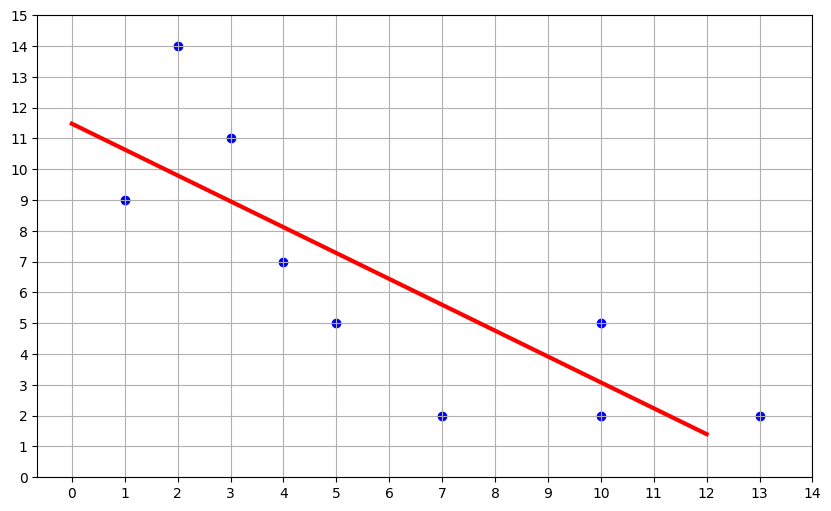

In [132]:
# Graficamos la regresión lineal de los datos de la tabla
plt.figure(figsize=(10, 6))
plt.scatter(X_, y_, color='blue')

temp = np.array([0, 12])
plt.plot(temp, B1_e*temp + B0_e, color='red', linewidth=3)
plt.xticks(np.arange(0, 15, 1))
plt.yticks(np.arange(0, 16, 1))
plt.grid()
plt.show()

In [133]:
# Realizamos una predicción.
modelo_lineal_simple.predict([[8]])

array([[4.74188312]])

In [134]:
# Vemos que parametros se uso es el modelo de regresion lineal
modelo_lineal_simple.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

# Ejemplo 3: Regresión Lineal Multiple con dos variables independentes (plano)

Se usa un ejemplo del video [YouTube](https://www.youtube.com/watch?v=ZmNDRnmYaPc)

In [135]:
data = {"x1": [1, 2, 3, 4, 5], "x2": [1, 3, 5, 7, 9], "y": [3.50, 6.25, 9.00, 11.75, 14.50]}
df = pd.DataFrame(data)
print(df)

   x1  x2      y
0   1   1   3.50
1   2   3   6.25
2   3   5   9.00
3   4   7  11.75
4   5   9  14.50


In [136]:
# Separar las variables dependientes e independientes
X = df[["x1", "x2"]].values # Crear un arreglo numpy con las variables independientes
y = df["y"].values # Crear un arreglo numpy con la variable dependiente

# Crear y ajustar el modelo de regresión
model = LinearRegression() # Crear un objeto de regresión lineal múltiple
model.fit(X, y) # Entrenar el modelo con los datos

# Obtener los coeficientes y el término independiente del modelo
a = model.intercept_ # Obtener el término independiente
b1, b2 = model.coef_ # Obtener los coeficientes
print(f"La ecuación del plano es: y = {a:.2f} + {b1:.2f}x1 + {b2:.2f}x2") # Mostrar la ecuación del plano


La ecuación del plano es: y = 1.85 + 0.55x1 + 1.10x2


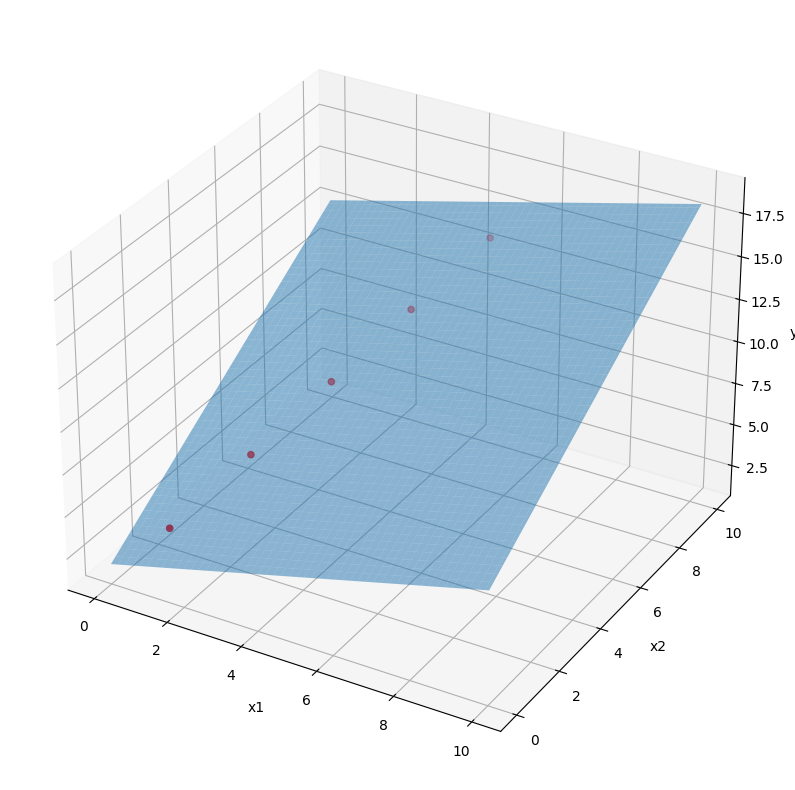

In [137]:
#graficar el plano
x1 = np.linspace(0, 10, 100) # Crear un arreglo con 100 valores entre 0 y 10
x2 = np.linspace(0, 10, 100) # Crear un arreglo con 100 valores entre 0 y 10
X1, X2 = np.meshgrid(x1, x2) # Crear una malla con los valores de x1 y x2
Y = a + b1*X1 + b2*X2 # Calcular los valores de y para cada punto de la malla

fig = plt.figure(figsize=(10, 10)) # Crear una figura
ax = fig.add_subplot(111, projection='3d') # Crear un subplot 3D
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o') # Graficar los puntos
ax.plot_surface(X1, X2, Y, alpha=0.5) # Graficar la superficie
ax.set_xlabel('x1') # Etiqueta del eje x
ax.set_ylabel('x2') # Etiqueta del eje y
ax.set_zlabel('y') # Etiqueta del eje z
plt.show() # Mostrar la figura

# Ejemplo 2: Polynomial regression

$$ f(x) = \frac{1}{50} \cdot x³ -\frac{1}{2} \cdot x - \frac{1}{3} $$
$$ f(x) = 0.02 \cdot x³ -0.5 \cdot x - 0.333 $$

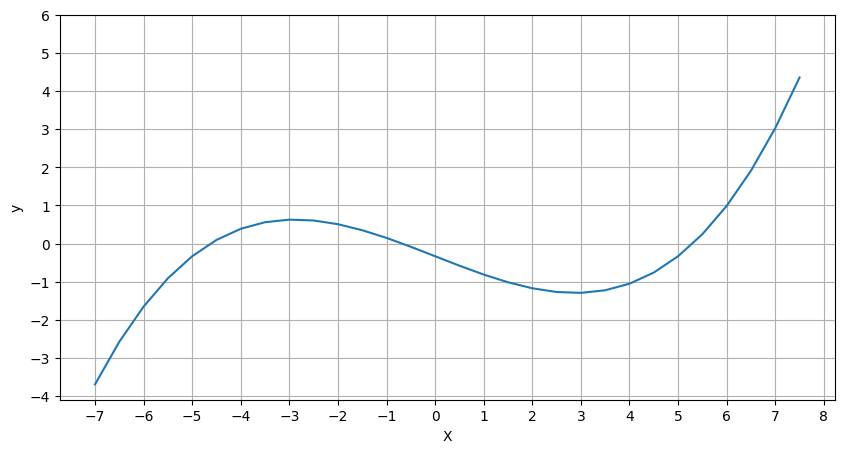

In [138]:
X = np.arange(-7, 8, 0.5)
y = 1/50 * X**3 - 1/2*X - 1/3

plt.figure(figsize=(10, 5))
plt.plot(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.xticks(np.arange(-7, 9, 1))
plt.yticks(np.arange(-4, 7, 1))
plt.grid()
plt.show()


Vamos a buscar los coefientes de los polinomios usando el modelo de regresion polinomica.

In [139]:
# Transformar los datos de X en un polinomio de grado 4
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X.reshape(-1, 1))

# Ajustar el modelo a los datos transformados
model = LinearRegression()
model.fit(X_poly, y)



LinearRegression()

In [140]:
print(model.intercept_, model.coef_)
# Escriibimos la ecuación de la recta polinómica usando model.intercept_ y model.coef_
print("f(x) = ", model.coef_[3], "x^3", model.coef_[1], "x", "+", model.intercept_)

-0.3333333333333346 [ 0.00000000e+00 -5.00000000e-01  7.63278329e-17  2.00000000e-02]
f(x) =  0.019999999999999962 x^3 -0.49999999999999856 x + -0.3333333333333346
